<a href="https://colab.research.google.com/github/nvrancovich/gh22-twitter-PLN/blob/main/notebooks/menciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import date
pd.set_option('display.max_colwidth', None)

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/proyectos/gh22-twitter-PLN/data/tweets.csv', index_col=0)

In [4]:
df

,Date,Tweet
0,2022-12-17 22:11:45+00:00,Que paso con @MatiasSchrank ??? \n#gh2022 #gh22 #GranHermano
1,2022-12-17 22:11:33+00:00,Conejo diciendo que si Coti le atraía hate la dejaba a la mierda jdjjd #GranHermano #GH2022
2,2022-12-17 22:11:28+00:00,🤡🤡 así quedamos los que queríamos que entre la Constanza y Lucas #GH22 #GH2002
3,2022-12-17 22:11:27+00:00,"Qué cagón es el conejo, puro físico al pedo, reperseguido por el grito de traidor le pregunta a todos porqué le habrán gritado eso. Se pone en evidencia sólo. Que vaya a patotear ahora. Que guarde las bolsas negras, mejor.\n\n#GH22 #GH2022 #GranHermano https://t.co/J9bq3wVokn"
4,2022-12-17 22:11:25+00:00,Este gordo dijo que nos iba a divertir y ahí lo tenes. Nos re cago.\n\n#GH22 #GranHermano2022 #gh20222 https://t.co/w3a6ySv0vW
...,...,...
2639672,2022-10-15 01:31:19+00:00,#GH2022 se los come vivos. No digan que no avisamos https://t.co/T6hbDg0TTr
2639673,2022-10-15 00:40:26+00:00,Me pasan por la cuca que @MatiasSchrank subcampeon de GH en América esta adentro de #GH2022???. ME CAIGO Y ME LEVANTO https://t.co/tgtFRGv1XG
2639674,2022-10-15 00:11:00+00:00,"#DebateDelViernes, los extrañe el viernes pasado !!! Y hoy, los disfrutamos !!! Se escucha muy...muy bien !!! Cuánta expectativa con #GH2022 !! Gustavo (Rosario)"
2639675,2022-10-14 21:11:16+00:00,🔥Nueva Promo\n\nDesde Próximo Lunes A Las 21:45Hs. Arranca #GranHermano #GH2022 Con La Conducción @SANTIAGODELMORO En @telefe https://t.co/h9WDJbHumM


In [5]:
len(df)

2639677

La hora está adelantada 3 horas respecto a la de Argentina

In [6]:
df.Date = pd.to_datetime(df.Date)
df.Date[0]

Timestamp('2022-12-17 22:11:45+0000', tz='UTC')

In [7]:
df.Date = df.Date - pd.Timedelta(hours=3)
df.Date[0]

Timestamp('2022-12-17 19:11:45+0000', tz='UTC')

Cambiando el Date a solo fecha


In [8]:
df.Date = df.Date.dt.date

In [9]:
df.groupby('Date').count()

,Tweet
Date,
2022-10-14,6
2022-10-15,56
2022-10-16,74
2022-10-17,36251
2022-10-18,17039
...,...
2022-12-13,26689
2022-12-14,54825
2022-12-15,64351


In [10]:
print(df.groupby('Date').count().median())
print(df.groupby('Date').count().mean())

Tweet    38599.0
dtype: float64
Tweet    40610.415385
dtype: float64


Creando una columna con una lista de los participantes mencionados en el tweet

In [11]:
import numpy as np

In [12]:
def filtro(tweet):
  contador = 0
  mencionados = []

  participantes = {
    'marcos':['marcos','marquitos','primo'],
    'tomas':['tomás','holder','tomas'],
    'julieta':['julieta','juli'],
    'coti':['coti','coty'],
    'daniela':['daniela','dani','pestañela'],
    'nacho':['nacho'],
    'agustin':['agustin','agustín','frodo','agus'],
    'maxi':['maxi'],
    'alexis':['alexis','cone','conejo'],
    'walter':['walter','alfa'],
    'romina':['romina','romi'],
    'thiago':['thiago'],
    'maria':['maria','cata'],
    'mora':['mora'],
    'lucila':['lucila','tora'],
    'juan':['juan'],
    'juliana':['juliana','tini'],
    'martina':['martina']
  }

  for participante in participantes:
    for apodo in participantes[participante]:
      if apodo in tweet:
        contador += 1
        mencionados.append(participante)
        break
  if len(mencionados) == 0:
    return np.NaN
  else:
    return mencionados

In [13]:
df['Tweet'] = df['Tweet'].str.lower()
df['mencionados'] = df['Tweet'].apply(filtro)

In [14]:
df = df.dropna()

In [15]:
len(df)

1833517

In [16]:
filas = df[['Date','mencionados']].to_dict('records')
filas[:5]

[{'Date': datetime.date(2022, 12, 17), 'mencionados': ['coti', 'alexis']},
 {'Date': datetime.date(2022, 12, 17), 'mencionados': ['alexis']},
 {'Date': datetime.date(2022, 12, 17), 'mencionados': ['daniela']},
 {'Date': datetime.date(2022, 12, 17), 'mencionados': ['julieta']},
 {'Date': datetime.date(2022, 12, 17), 'mencionados': ['walter']}]

In [17]:
conteo = []

for fila in filas:
  for mencionado in fila['mencionados']:
    conteo.append({'fecha':fila['Date'], 'mencionado':mencionado, 'menciones':1})

In [18]:
df = pd.DataFrame(conteo).groupby(['fecha','mencionado']).count().reset_index()
df.head()

,fecha,mencionado,menciones
0,2022-10-14,maria,1
1,2022-10-15,agustin,1
2,2022-10-15,romina,1
3,2022-10-16,agustin,1
4,2022-10-16,tomas,1


In [19]:
import plotly.express as px
import matplotlib.pyplot as plt

In [20]:
df

,fecha,mencionado,menciones
0,2022-10-14,maria,1
1,2022-10-15,agustin,1
2,2022-10-15,romina,1
3,2022-10-16,agustin,1
4,2022-10-16,tomas,1
...,...,...,...
1117,2022-12-17,nacho,954
1118,2022-12-17,romina,653
1119,2022-12-17,thiago,636
1120,2022-12-17,tomas,43


In [21]:
fig = px.line(df, x="fecha", y="menciones", color='mencionado')
fig.show()

In [22]:
df.pivot(index='fecha', columns='mencionado', values='menciones').corr()

mencionado,agustin,alexis,coti,daniela,juan,juliana,julieta,lucila,marcos,maria,martina,maxi,mora,nacho,romina,thiago,tomas,walter
mencionado,,,,,,,,,,,,,,,,,,
agustin,1.000000,0.036742,0.295111,0.242546,0.188873,0.114429,0.303110,0.272636,0.631451,0.250068,-0.288796,0.231368,0.312511,0.273793,0.472355,0.289380,-0.128587,0.271466
alexis,0.036742,1.000000,0.764451,0.457011,-0.077850,0.215873,0.581828,0.193535,0.314913,0.128484,-0.106174,0.342617,-0.028760,0.249588,0.431428,0.351308,-0.089630,0.176322
coti,0.295111,0.764451,1.000000,0.554516,0.131099,0.170550,0.578039,0.254959,0.405691,0.213281,-0.200133,0.388428,0.241739,0.339319,0.570965,0.414150,-0.098891,0.265293
daniela,0.242546,0.457011,0.554516,1.000000,0.060675,0.005841,0.410542,0.071666,0.258633,0.472655,-0.272296,0.180847,-0.023785,0.703748,0.601845,0.356043,-0.266478,0.389910
juan,0.188873,-0.077850,0.131099,0.060675,1.000000,0.147332,0.120223,0.549784,0.155834,0.018891,0.200752,0.052023,0.336527,0.197036,-0.034285,-0.021729,0.193878,0.539468
juliana,0.114429,0.215873,0.170550,0.005841,0.147332,1.000000,0.776807,0.604444,0.151640,0.556714,-0.196312,0.493625,-0.053721,0.089987,0.262255,-0.219581,-0.155039,0.186103
julieta,0.303110,0.581828,0.578039,0.410542,0.120223,0.776807,1.000000,0.456804,0.479897,0.521915,-0.260324,0.571803,-0.073013,0.322162,0.560483,0.154306,-0.242160,0.306129
lucila,0.272636,0.193535,0.254959,0.071666,0.549784,0.604444,0.456804,1.000000,0.202028,0.327335,-0.176106,0.146141,0.272492,0.089057,0.053250,-0.278023,-0.137899,0.349077
marcos,0.631451,0.314913,0.405691,0.258633,0.155834,0.151640,0.479897,0.202028,1.000000,0.197555,-0.188189,0.219594,0.073052,0.338910,0.357965,0.242963,0.137731,0.201276


In [23]:
import seaborn as sn
import matplotlib.pyplot as plt

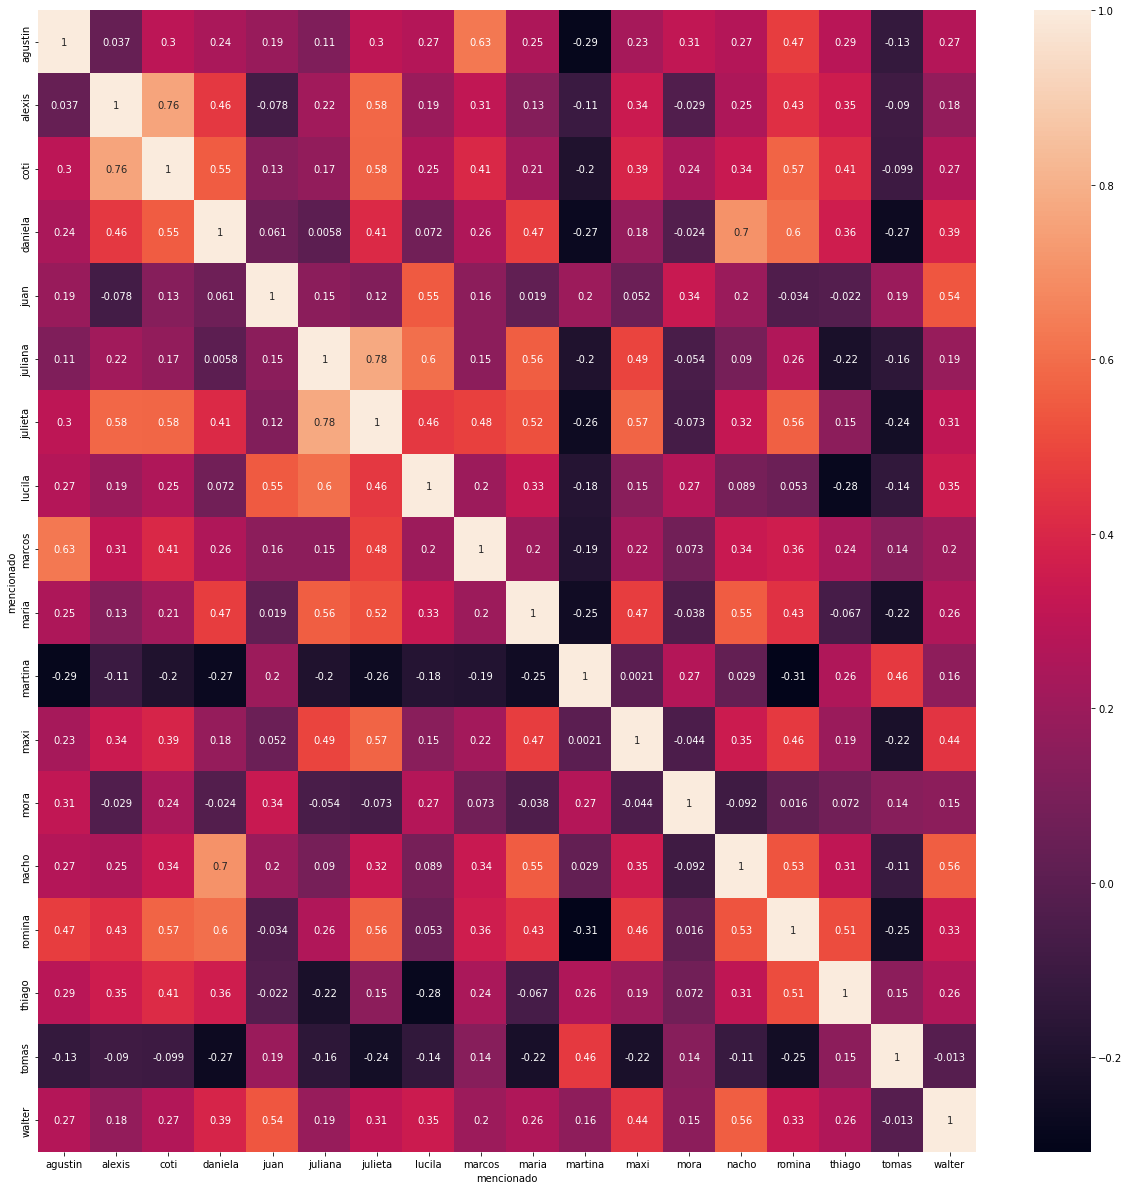

In [24]:
fig = plt.figure(figsize=(21, 21))
sn.heatmap(df.pivot(index='fecha', columns='mencionado', values='menciones').corr(), annot=True)
plt.show()